In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

# MovieLens 데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Google colab: 데이터 경로 설정
path = '/content/drive/My Drive/data/movielens/'

In [ ]:
os.listdir(path)

In [5]:
tags_df = pd.read_csv(os.path.join(path, 'tags.csv'), encoding='utf-8')
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), index_col = 'userId', encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path, 'movies.csv'), index_col = 'movieId', encoding='utf-8')

In [6]:
ratings_df.reset_index(inplace=True)
print(ratings_df.shape)
print(ratings_df.head())

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [7]:
print(tags_df.shape)
print(tags_df.head())

(3683, 4)
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [8]:
print(movies_df.shape)
print(movies_df.head())

(9742, 2)
                                      title                                       genres
movieId                                                                                 
1                          Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
2                            Jumanji (1995)                   Adventure|Children|Fantasy
3                   Grumpier Old Men (1995)                               Comedy|Romance
4                  Waiting to Exhale (1995)                         Comedy|Drama|Romance
5        Father of the Bride Part II (1995)                                       Comedy


# 평점 데이터의 기초 통계량

In [9]:
n_unique_users = len(ratings_df['userId'].unique())
print(n_unique_users)

610


In [10]:
print('평점의 평균: ', ratings_df['rating'].mean())
print('평점의 표준편차: ', ratings_df['rating'].std())

평점의 평균:  3.501556983616962
평점의 표준편차:  1.0425292390605359


In [11]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [12]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [13]:
# nan 값이 있는지 확인한다
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bccaf3e10>,
      dtype=object)

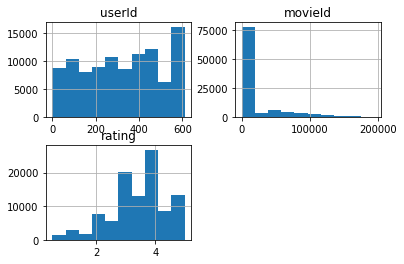

In [14]:
ratings_df[['userId','movieId','rating']].hist()

**User별로 평점을 매긴 갯수, 평균 평점, 평점을 매긴 영화 수 등 구하기**

In [15]:
ratings_df.groupby(['userId', 'rating']).size()

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
                 ... 
610     3.0       230
        3.5       315
        4.0       286
        4.5       148
        5.0       180
Length: 3976, dtype: int64

In [16]:
ratings_df.groupby(['userId']).mean()

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


In [17]:
userid_rating_df = pd.DataFrame({'count' : ratings_df.groupby(['userId', 'rating']).size()})
userid_rating_df = userid_rating_df.reset_index()
userid_rating_df.head(10)

,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124
5,2,2.0,1
6,2,2.5,1
7,2,3.0,4
8,2,3.5,4
9,2,4.0,9


In [18]:
user_info = ratings_df.groupby('userId')['movieId'].count()

In [19]:
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [20]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


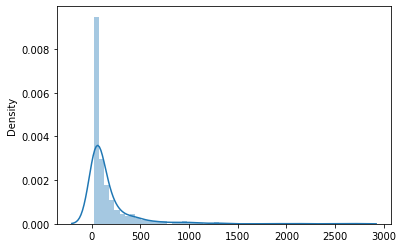

In [21]:
# user가 몇개의 영화에 대해서 rating을 했는지를 볼 수 있는 분포(그래프)
sns.distplot(user_info.values)

In [23]:
stats_df = pd.DataFrame({
    'movie_count': ratings_df.groupby('userId')['movieId'].count(),
    'rating_avg': ratings_df.groupby('userId')['rating'].mean(), 
    'rating_std': ratings_df.groupby('userId')['rating'].std()})

print(stats_df.shape)
print(stats_df.head())

(610, 3)
        movie_count  rating_avg  rating_std
userId                                     
1               232    4.366379    0.800048
2                29    3.948276    0.805615
3                39    2.435897    2.090642
4               216    3.555556    1.314204
5                44    3.636364    0.990441


# '평점이 많은 영화는 평점이 높을까?'라는 가설에 대한 확인


In [24]:
movieid_user_df = pd.DataFrame({
    'num_users_watch': ratings_df.groupby('movieId')['userId'].count(),
    'avg_ratings': ratings_df.groupby('movieId')['rating'].mean(),
    'std_ratings': ratings_df.groupby('movieId')['rating'].std()
})
movieid_user_df = movieid_user_df.reset_index()
print(movieid_user_df.shape)
print(movieid_user_df.head(10))

(9724, 4)
   movieId  num_users_watch  avg_ratings  std_ratings
0        1              215     3.920930     0.834859
1        2              110     3.431818     0.881713
2        3               52     3.259615     1.054823
3        4                7     2.357143     0.852168
4        5               49     3.071429     0.907148
5        6              102     3.946078     0.817224
6        7               54     3.185185     0.977561
7        8                8     2.875000     1.125992
8        9               16     3.125000     0.974679
9       10              132     3.496212     0.859381


In [27]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False)

,movieId,num_users_watch,avg_ratings,std_ratings
314,356,329,4.164134,0.831244
277,318,317,4.429022,0.713019
257,296,307,4.197068,0.951997
510,593,279,4.161290,0.853983
1938,2571,278,4.192446,0.975243
...,...,...,...,...
3053,4093,1,1.500000,NaN
3049,4089,1,2.000000,NaN
6687,58351,1,4.000000,NaN
3045,4083,1,4.000000,NaN


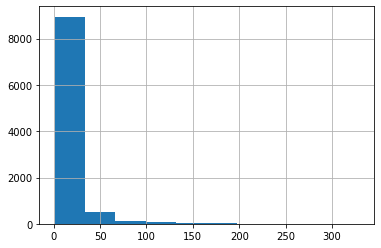

In [26]:
# long tail economy
movieid_user_df['num_users_watch'].hist()

In [28]:
# 1번 또는 1명만 평점을 준 영화
movieid_user_df['movieId'][movieid_user_df.num_users_watch == 1].count()

3446

In [29]:
# 3번 미만의 영화
movieid_user_df['movieId'][movieid_user_df.num_users_watch < 3].count()

4744

# 평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)

In [30]:
# 영화 정보를 활용
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
# 평점을 많은 사람에게 받은 영화 
ratings_count_df = ratings_df.groupby('movieId')['userId'].count()
ratings_count_df.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [31]:
df = pd.DataFrame({
    'ratings_count': ratings_df.groupby('movieId')['userId'].count(),
})

print(df.head())

         ratings_count
movieId               
1                  215
2                  110
3                   52
4                    7
5                   49


In [35]:
df['movie_name'] = df.apply(lambda x: movies_df['title'].loc[x.index])

In [36]:
df.head(10)

,ratings_count,movie_name
movieId,,
1,215,Toy Story (1995)
2,110,Jumanji (1995)
3,52,Grumpier Old Men (1995)
4,7,Waiting to Exhale (1995)
5,49,Father of the Bride Part II (1995)
6,102,Heat (1995)
7,54,Sabrina (1995)
8,8,Tom and Huck (1995)
9,16,Sudden Death (1995)


In [34]:
df.sort_values(by='ratings_count', ascending=False)

,ratings_count,movie_name
movieId,,
356,329,Forrest Gump (1994)
318,317,"Shawshank Redemption, The (1994)"
296,307,Pulp Fiction (1994)
593,279,"Silence of the Lambs, The (1991)"
2571,278,"Matrix, The (1999)"
...,...,...
4093,1,Cop (1988)
4089,1,Born in East L.A. (1987)
58351,1,City of Men (Cidade dos Homens) (2007)


# 특정 영화의 평점 분포

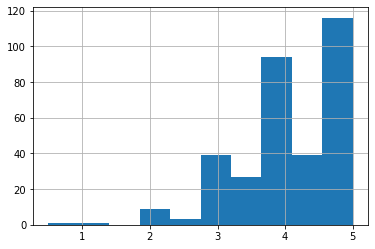

In [37]:
ratings_df[ratings_df.movieId == 356]['rating'].hist() #Forrest Gump

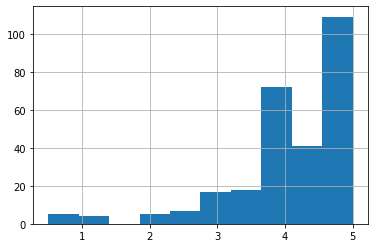

In [38]:
ratings_df[ratings_df.movieId == 2571]['rating'].hist() #Matrix, The(1999)

특정 유저가 주는 평점과 실제 영화에 대한 평점 분포가 비슷할까?
- 나는 일반적인 영화 관람객일까? 특이한 취향을 갖고 있는 사람일까?

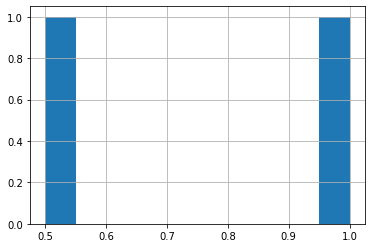

In [ ]:
ratings_df[(ratings_df.movieId == 356) & (ratings_df.rating < 2)]['rating'].hist()

##장르 분석하기

In [39]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [42]:
all_genres = [x.split('|') for x in movies_df['genres'].values]

In [44]:
import itertools
genres = list(set(list(itertools.chain(*all_genres))))
print(len(all_genres))
print(len(genres))
print(genres)

9742
20
['Crime', 'Action', 'Children', 'Sci-Fi', 'Drama', 'Musical', 'War', 'Thriller', 'Film-Noir', 'Western', 'Documentary', 'Animation', 'Mystery', 'Romance', '(no genres listed)', 'Horror', 'Fantasy', 'IMAX', 'Adventure', 'Comedy']


In [45]:
genres_df = pd.DataFrame(columns=genres, index=movies_df.index)
genres_df.head()

,Crime,Action,Children,Sci-Fi,Drama,Musical,War,Thriller,Film-Noir,Western,Documentary,Animation,Mystery,Romance,(no genres listed),Horror,Fantasy,IMAX,Adventure,Comedy
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
genres_df = movies_df['genres'].str.get_dummies(sep='|')
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
movies_df = pd.concat([movies_df, genres_df], axis=1)
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#특정 장르의 평점과 user 분석

In [49]:
movieid_list = movies_df['title'][movies_df.Animation == 1]
movieid_list.index

Int64Index([     1,     13,     48,    239,    313,    364,    551,    558,
               588,    594,
            ...
            182639, 183897, 187541, 190219, 193565, 193567, 193573, 193581,
            193583, 193587],
           dtype='int64', name='movieId', length=611)

In [50]:
animation_df = ratings_df[ratings_df['movieId'].isin(movieid_list.index)]
animation_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
35,1,596,5.0,964982838
38,1,661,5.0,964982838
39,1,673,3.0,964981775
50,1,1023,5.0,964982681
...,...,...,...,...
100798,610,146309,4.0,1493850187
100805,610,149406,3.5,1479542295
100808,610,152081,4.0,1493846503
100813,610,157296,4.0,1493846563


In [53]:
# user는 animation장르의 영화에 대해 다음과 같은 평점을 부여
animation_df.groupby('userId')['rating'].mean()

userId
1      4.689655
3      0.500000
4      4.000000
5      4.333333
6      4.071429
         ...   
606    3.714286
607    3.333333
608    3.118182
609    3.000000
610    3.901515
Name: rating, Length: 527, dtype: float64

#장르 간 상관 관계 분석

In [52]:
genres_df.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


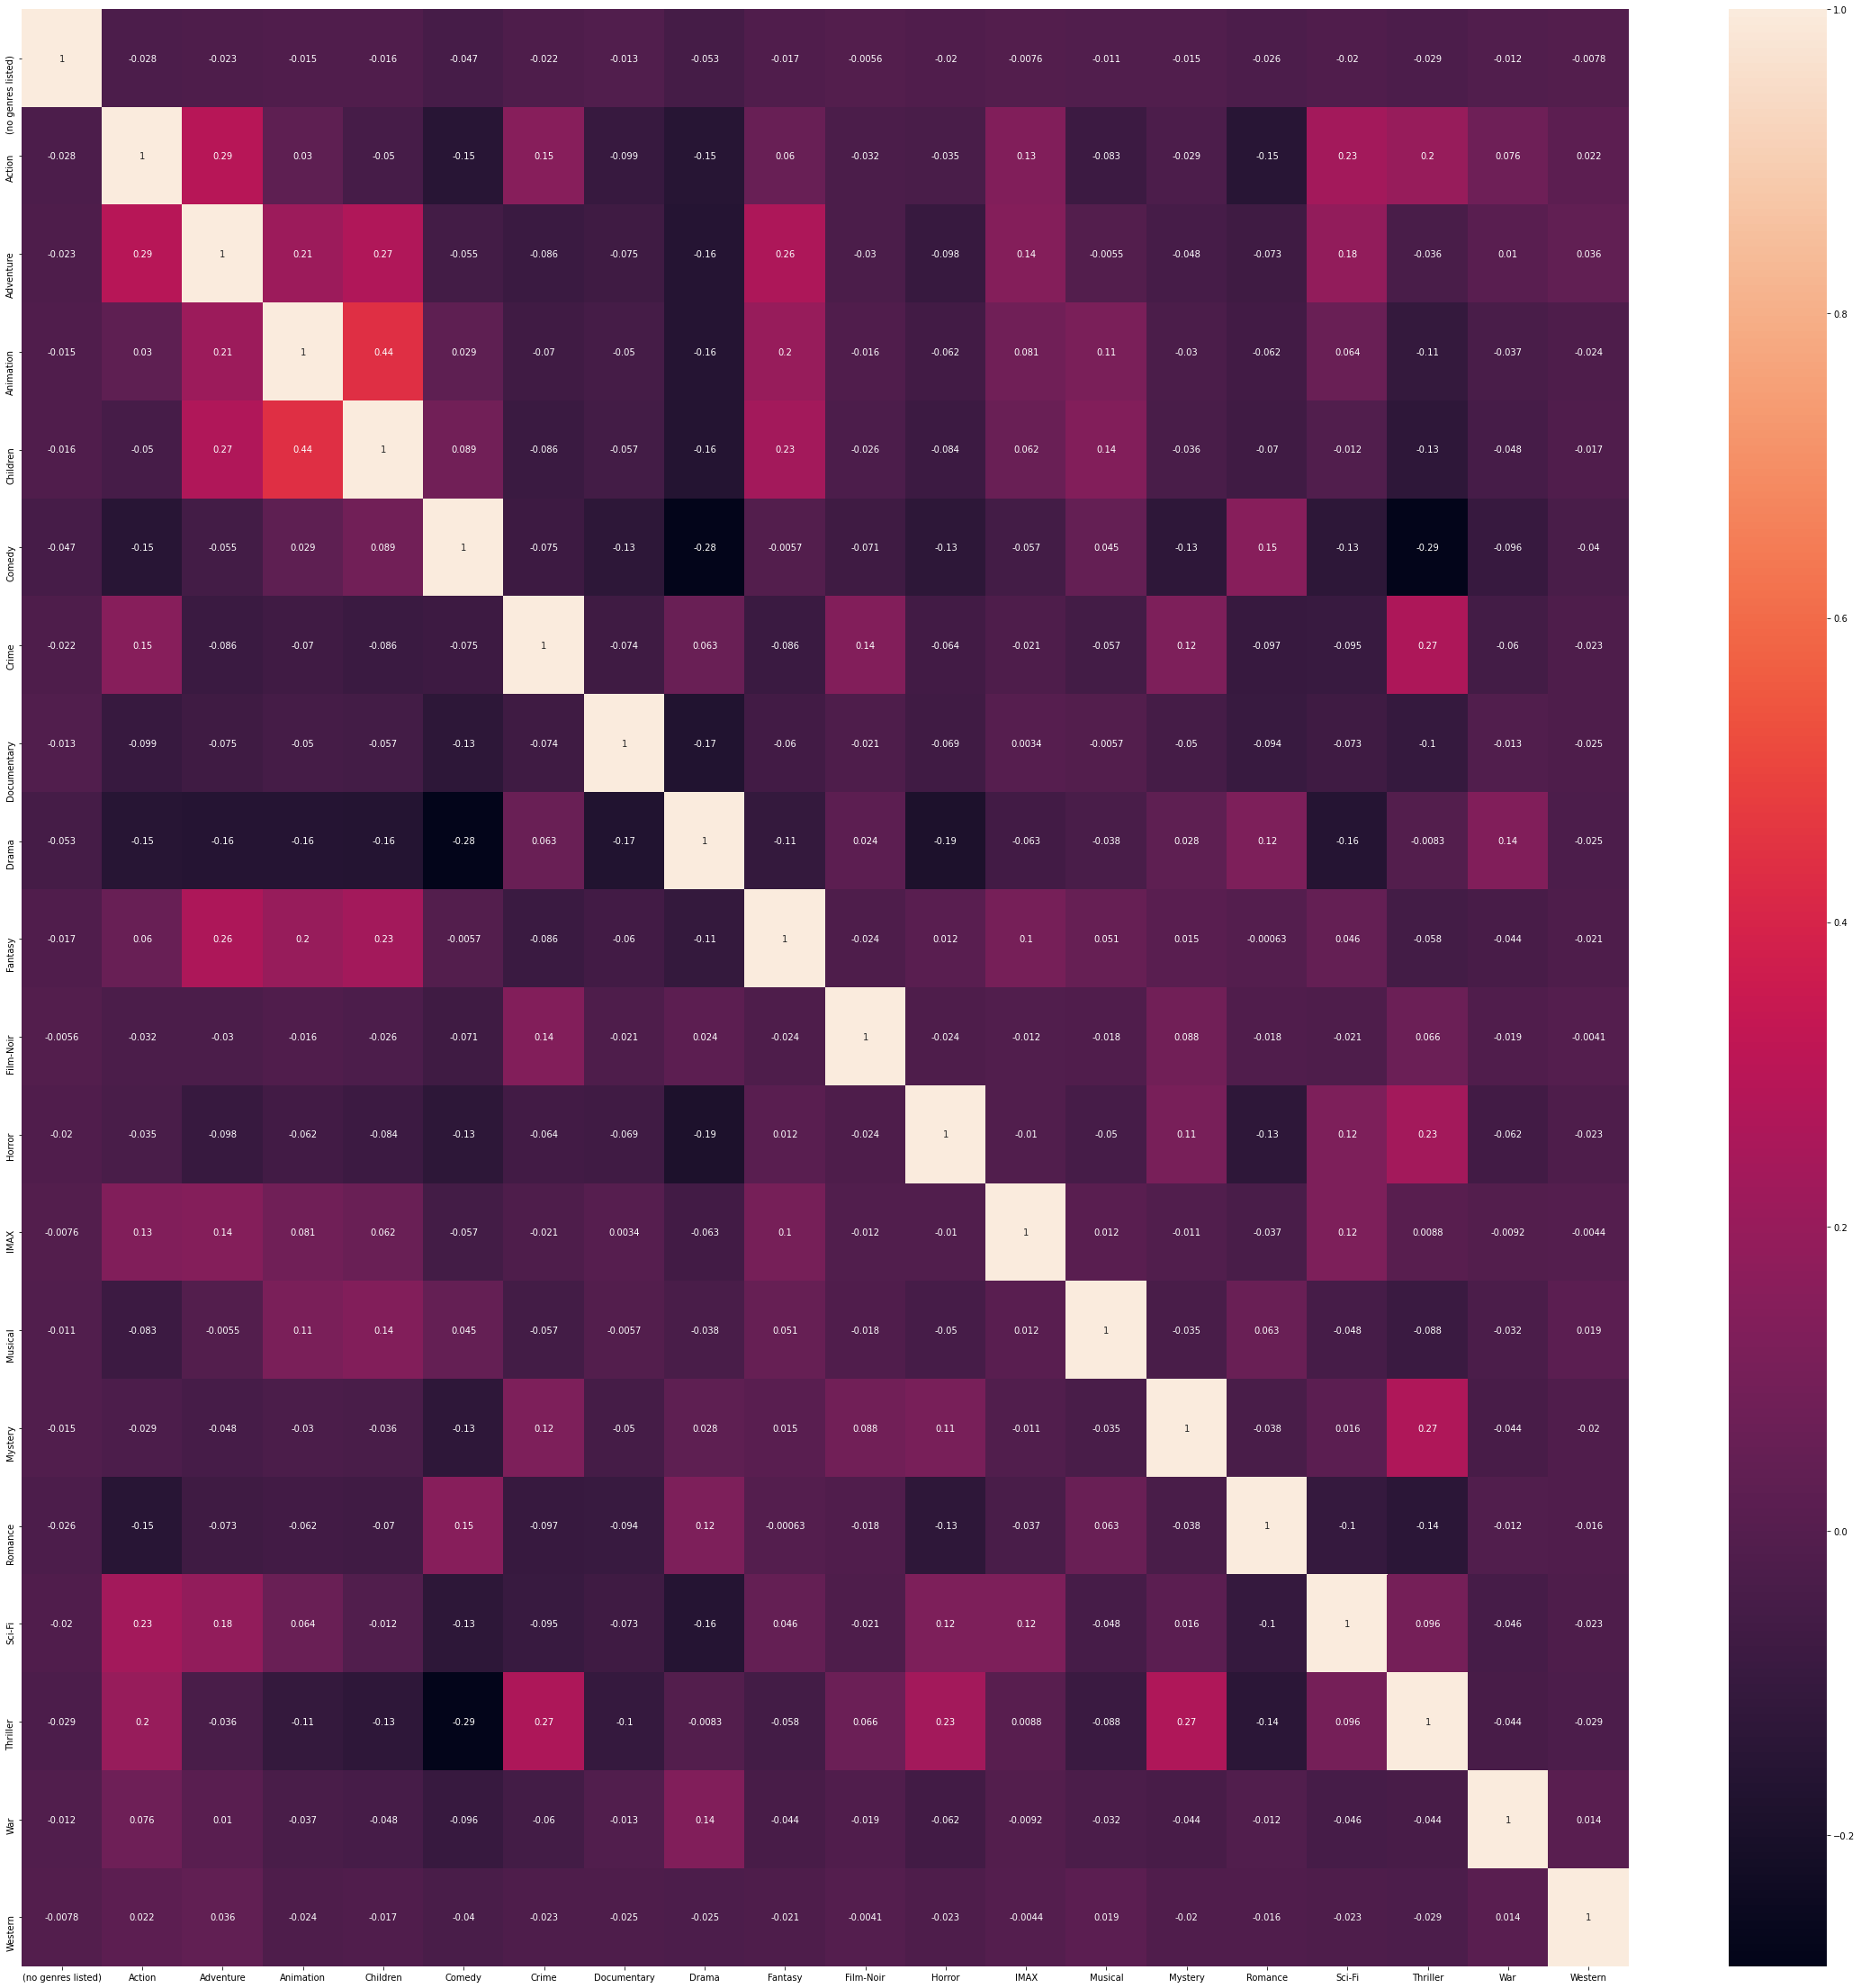

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(genres_df.corr(), annot=True)

#영화 이름, 연도 분석

In [ ]:
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
title_df = movies_df[['title', 'genres']]
title_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [55]:
title_df['year'] = title_df['title'].str.extract('(\(\d\d\d\d\))')
title_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
2,Jumanji (1995),Adventure|Children|Fantasy,(1995)
3,Grumpier Old Men (1995),Comedy|Romance,(1995)
4,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
5,Father of the Bride Part II (1995),Comedy,(1995)


In [56]:
title_df.isna().sum()

title      0
genres     0
year      13
dtype: int64

In [58]:
title_df[title_df['year'].isnull()]

,title,genres,year
movieId,,,
40697,Babylon 5,Sci-Fi,NaN
140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
143410,Hyena Road,(no genres listed),NaN
147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
149334,Nocturnal Animals,Drama|Thriller,NaN
156605,Paterson,(no genres listed),NaN
162414,Moonlight,Drama,NaN
167570,The OA,(no genres listed),NaN
171495,Cosmos,(no genres listed),NaN


In [61]:
# 연도가 없는 영화 또는 (no genres listed)라고 표시된 영화는 드랍할 수 있다.
title_df[title_df.genres == '(no genres listed)'].shape

(34, 3)

In [62]:
title_df.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
title_df['year'] = title_df['year'].apply(lambda x: x.replace('(','').replace(')',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#연도별 영화 데이터 분석

In [64]:
year_freq_df = title_df.groupby('year')['title'].count()
year_freq_df

year
1902      1
1903      1
1908      1
1915      1
1916      4
       ... 
2014    278
2015    274
2016    218
2017    147
2018     41
Name: title, Length: 106, dtype: int64

In [65]:
year_freq_df.sort_values(ascending=False)

year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1917      1
1915      1
1908      1
1903      1
1902      1
Name: title, Length: 106, dtype: int64

In [66]:
year_freq_df.describe()

count    106.000000
mean      91.783019
std      102.227757
min        1.000000
25%       16.000000
50%       39.500000
75%      151.500000
max      311.000000
Name: title, dtype: float64

In [67]:
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
title_df[title_df['year'] == '2017']

,title,genres,year
movieId,,,
122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017
122898,Justice League (2017),Action|Adventure|Sci-Fi,2017
122906,Black Panther (2017),Action|Adventure|Sci-Fi,2017
122916,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,2017
122918,Guardians of the Galaxy 2 (2017),Action|Adventure|Sci-Fi,2017
...,...,...,...
190215,Liquid Truth (2017),Drama,2017
191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,2017
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017


In [69]:
ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year']=='2017'].index)].mean()

3.5780911062906724

In [71]:
results = []
for year in title_df['year'].unique():
    avg_ratings = ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year'] == str(year)].index)].mean()
    results.append((year, avg_ratings))

result_df = pd.DataFrame(results, columns=['year','avg_ratings'])
result_df.sort_values(by='year')

,year,avg_ratings
91,1902,3.500000
92,1903,2.500000
105,1908,4.000000
84,1915,2.000000
87,1916,3.600000
...,...,...
100,2014,3.512879
101,2015,3.410386
102,2016,3.387261
103,2017,3.578091


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bb94b1090>]],
      dtype=object)

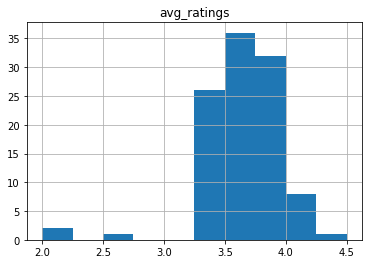

In [72]:
result_df.hist()